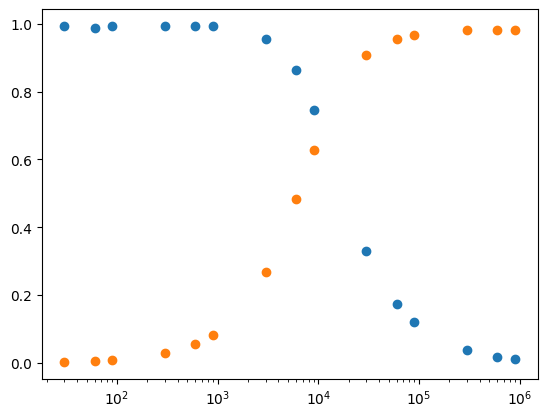

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

data1 = pd.read_csv("Passa basso.csv")
data2 = pd.read_csv("Passa alto.csv")
plt.xscale("log")
plt.scatter(data1["freq"], data1["V/V0"], label="Dati sperimentali")
plt.scatter(data2["freq"], data2["V/V0"], label="Dati sperimentali")

In [2]:
import numpy as np
primo = data1.iloc[7:12]
secondo = data2.iloc[7:12]

a1, b1 = np.polyfit(primo["freq"], primo["V/V0"], 1)
a2, b2 = np.polyfit(secondo["freq"], secondo["V/V0"], 1)

print(a1, b1)
print(a2, b2)

v = (b2-b1)/(a1-a2)
print("Frequenza di taglio: ", v)


-8.628383730046949e-06 0.7825789040718307
5.160872843309859e-06 0.5866330889109156
Frequenza di taglio:  14210.034755573104


10804.901204022744
31.582424555390798


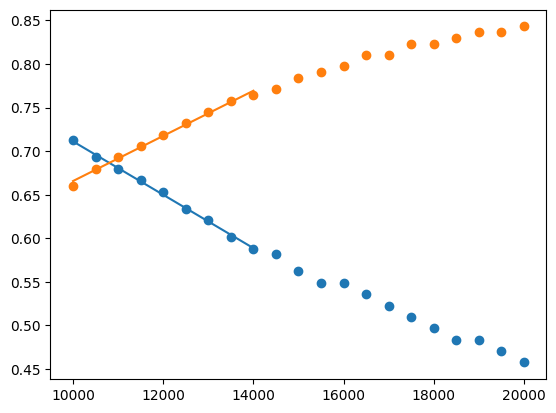

In [31]:
import pandas as pd
#from uncertainties import ufloat, correlated_values
from math import sqrt
d1 = pd.read_csv("Passa basso fine.csv")
d2 = pd.read_csv("Passa alto fine.csv")

plt.scatter(d1["freq"], d1["V/V0"])
plt.scatter(d2["freq"], d2["V/V0"])
w1 = 1/((d1["err V"]/d1["V0"])+(d1["err V"]/d1["Vmis"]))*d1["V/V0"]
w2 = 1/((d2["err V"]/d2["V0"])+(d2["err V"]/d2["Vmis"]))*d2["V/V0"]
(a1, b1), cov1 = np.polyfit(d1.iloc[0:9]["freq"], d1.iloc[0:9]["V/V0"], 1, w=w1.iloc[0:9], cov=True)
var_b1 = cov1[1,1]
var_a1 = cov1[0,0]
cov_1 = cov1[1,0]
lin = np.linspace(d1.iloc[0:9]["freq"].min(), d1.iloc[0:9]["freq"].max())
plt.plot(lin, a1*lin+b1)
(a2, b2), cov2 = np.polyfit(d2.iloc[0:9]["freq"], d2.iloc[0:9]["V/V0"], 1, w=w2.iloc[0:9], cov=True)
var_b2 = cov2[1,1]
var_a2 = cov2[0,0]
cov_2 = cov2[1,0]
lin = np.linspace(d2.iloc[0:9]["freq"].min(), d2.iloc[0:9]["freq"].max())
plt.plot(lin, a2*lin+b2)
v=(b2-b1)/(a1-a2)
sigma_v = ((b2-b1)**2/(a1-a2)**4)*(var_a1+var_a2)+(1/(a1-a2)**2)*(var_b1+var_b2)+2*((b2-b1)/(a1-a2)**3)*(cov_1+cov_2)
print(v)
print(sqrt(sigma_v))